In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
df= pd.read_csv(r"C:\Users\mmsso\Downloads\Electronic.csv")

In [ ]:
df

In [7]:
# Display the first five rows
df.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0,Morning


In [8]:
# Display the last five rows
df.tail()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
4995,24,1,39.583865,46.041614,1.000000,0,Male,West,Television,Credit Card,-64.457793,4.187345,9.136240,0,Morning
4996,66,5,172.486538,32.751346,1.000000,0,Male,East,Accessories,Debit Card,138.772917,3.868131,1.961965,0,Evening
4997,26,11,493.388104,5.000000,2.324783,0,Male,North,Television,Net Banking,1010.219124,4.172183,16.750489,0,Evening
4998,53,10,260.269589,23.973041,5.000000,1,Female,West,Accessories,Debit Card,1114.585926,3.942221,25.562475,1,Afternoon
4999,36,11,366.613874,13.338613,2.718373,0,Female,South,Accessories,Net Banking,988.644957,3.765622,19.076740,0,Morning


In [9]:
# Data types and structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                5000 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        5000 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          5000 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     5000 non-null   int64  
 14  Preferred Visit Time  5000 non-null   object 
dtypes: float64(6), int64(

In [10]:
# Statistical summary
df.describe()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975049,15.638275,0.308400
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250683,9.144742,0.461879
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799401,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969629,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149890,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235392,1.000000


In [11]:
#checks for duplicate rows
df.duplicated().sum()

0

In [12]:
#check for tuple representing
df.shape

(5000, 15)

In [16]:
#check the data types of each column
df.dtypes

Age                       int64
Items Purchased           int64
Total Spent             float64
Discount (%)            float64
Satisfaction Score      float64
Warranty Extension        int64
Gender                   object
Region                   object
Product Category         object
Payment Method           object
Revenue                 float64
Store Rating            float64
Loyalty Score           float64
Membership Status         int64
Preferred Visit Time     object
dtype: object

In [19]:
#list of all the column names 
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

In [23]:
# Check unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' 'Other']
Region: ['South' 'East' 'North' 'West']
Product Category: ['Accessories' 'Laptop' 'Tablet' 'Television' 'Mobile']
Payment Method: ['UPI' 'Cash' 'Credit Card' 'Net Banking' 'Debit Card']
Preferred Visit Time: ['Evening' 'Morning' 'Afternoon']


In [24]:
# Convert 'Date' to datetime if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# Convert target column to binary
df['Gender'] = df['Region'].apply(lambda x: 1 if x == 'Yes' else 0)


In [28]:
#***Exploratory Data Analysis (EDA)***

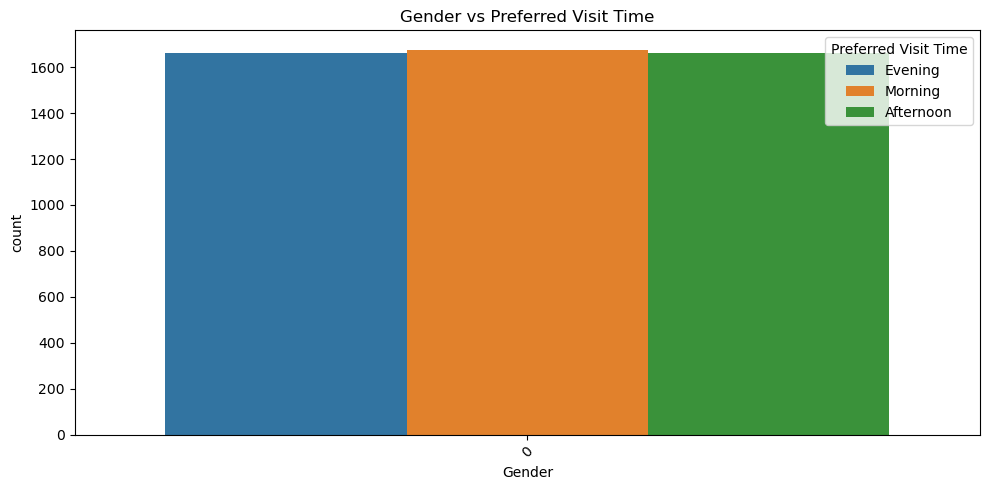

In [29]:
#Countplot of Actively Hiring by Job Type
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Preferred Visit Time', data=df)
plt.title('Gender vs Preferred Visit Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

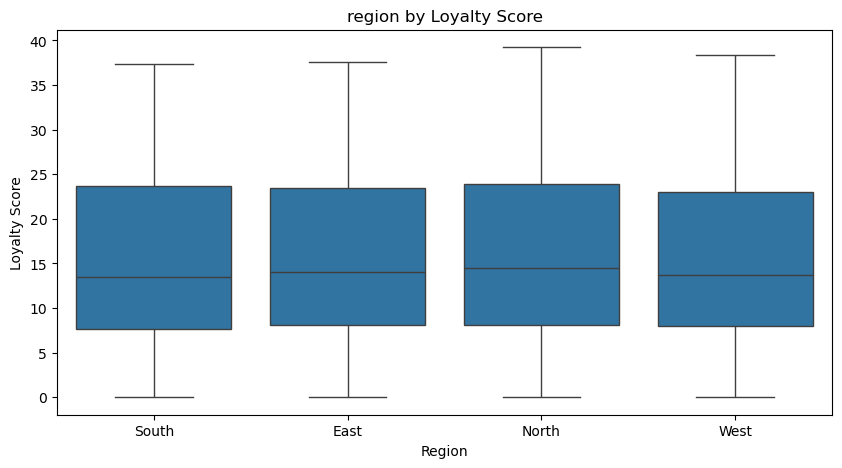

In [32]:
#Boxplot: Stipend by Hiring Status
plt.figure(figsize=(10,5))
sns.boxplot(x='Region', y='Loyalty Score', data=df)
plt.title('region by Loyalty Score')
plt.show()

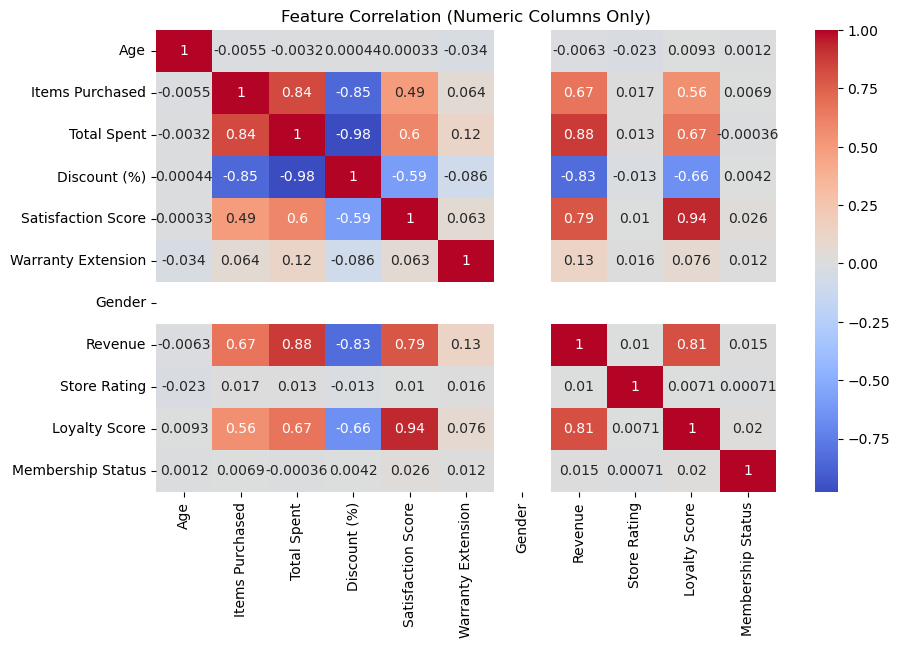

In [34]:
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Columns Only)")
plt.show()

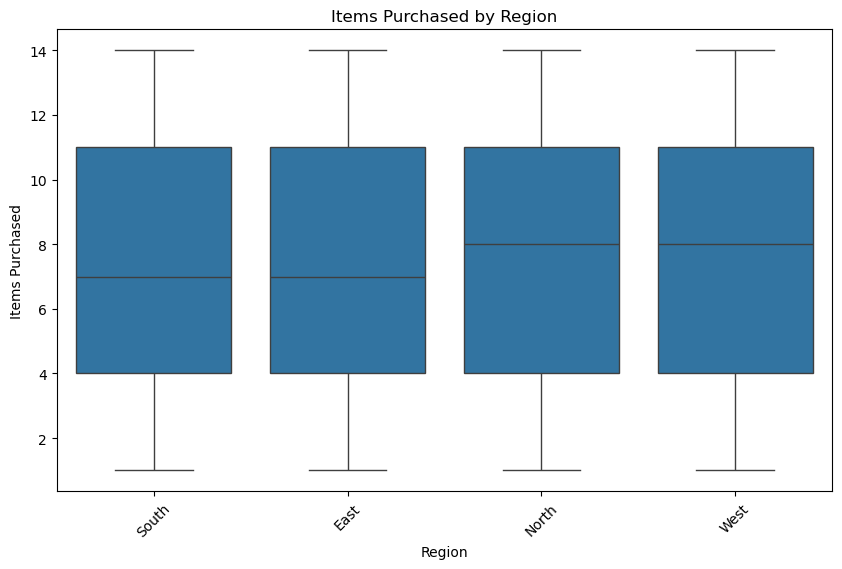

In [37]:
#boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Items Purchased', data=df)
plt.title('Items Purchased by Region')
plt.ylabel('Items Purchased')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

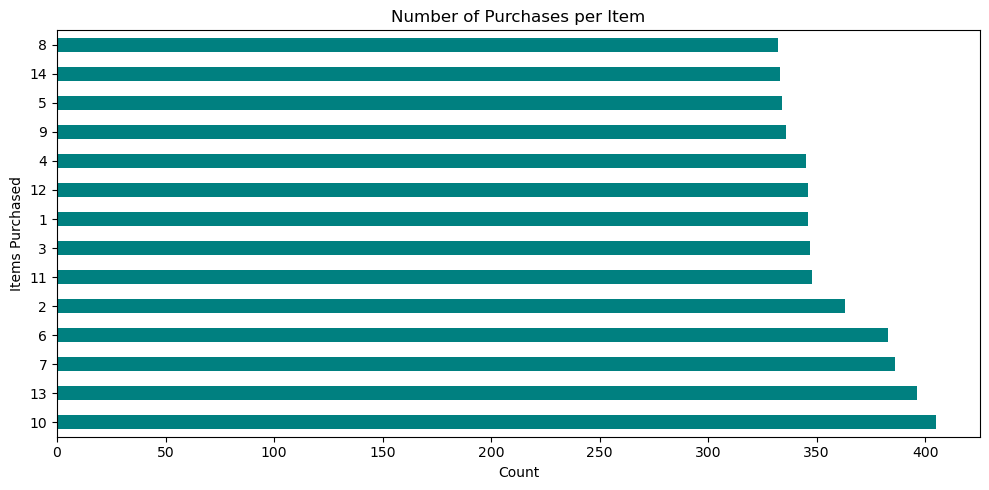

In [38]:
#Horizontal Bar Plot: Items Purchased
plt.figure(figsize=(10, 5))
df['Items Purchased'].value_counts().plot(kind='barh', color='teal')
plt.title('Number of Purchases per Item')
plt.xlabel('Count')
plt.ylabel('Items Purchased')
plt.tight_layout()
plt.show()

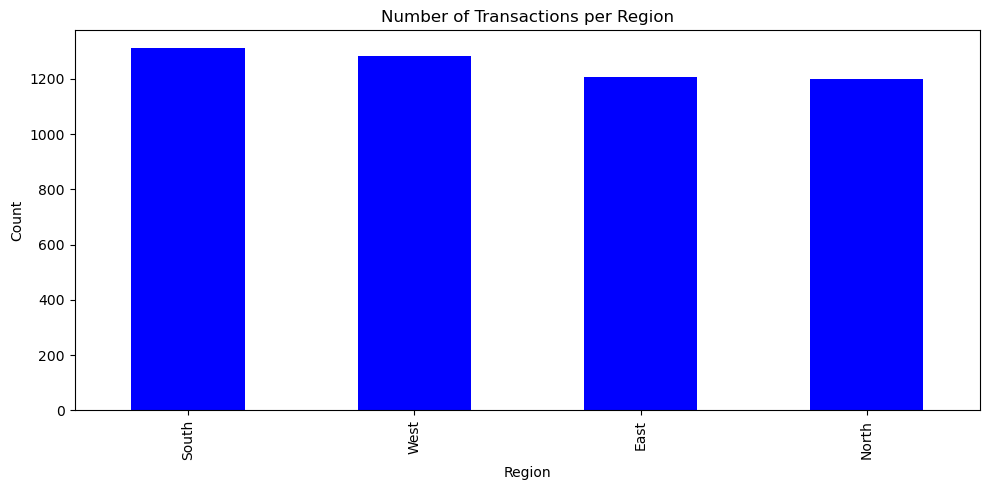

In [39]:
#Bar Plot: Number of Transactions per Region
plt.figure(figsize=(10, 5))
df['Region'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of Transactions per Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

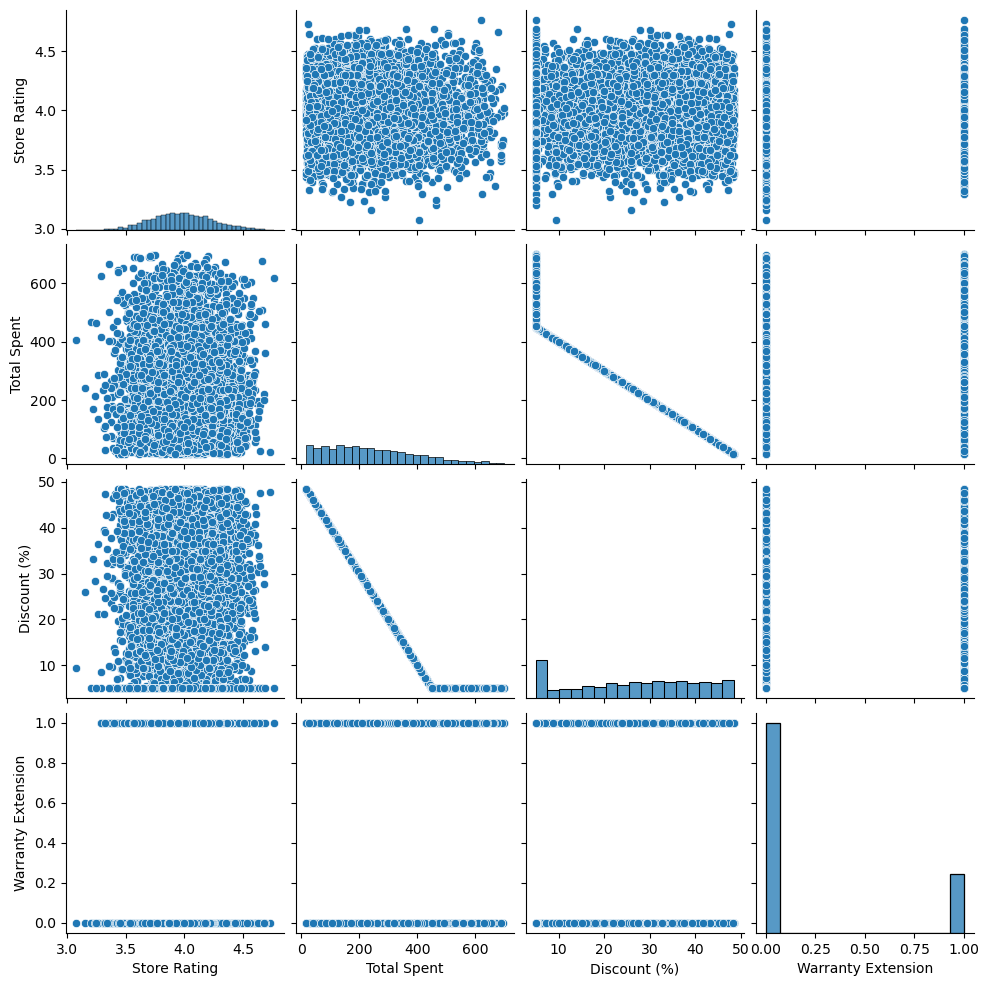

In [40]:
# Select numeric columns from your dataframe
sns.pairplot(df[["Store Rating", "Total Spent", "Discount (%)", "Warranty Extension"]])
plt.show()

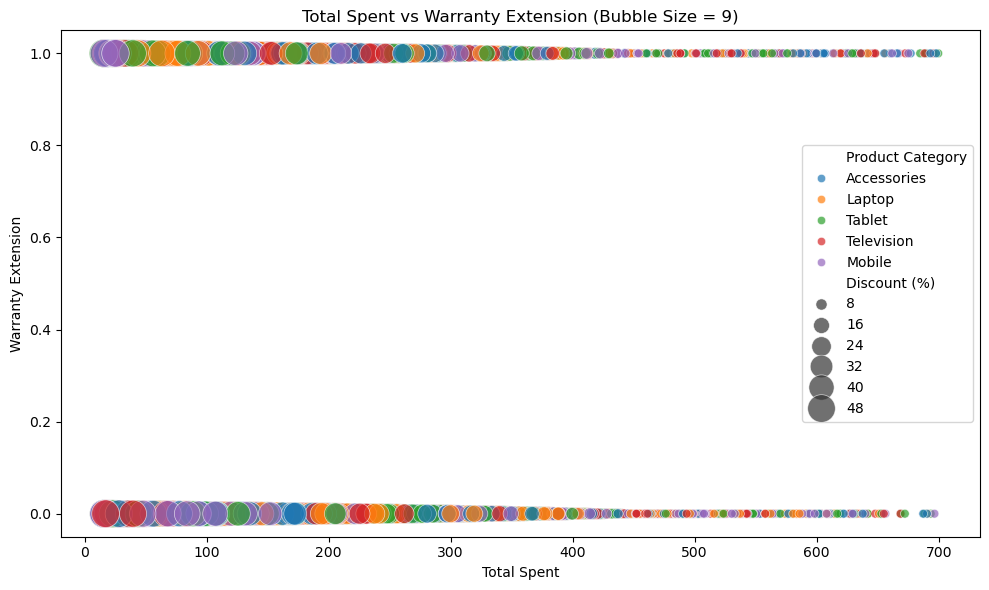

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Spent', y='Warranty Extension', hue='Product Category',
                size='Discount (%)', sizes=(40, 400), alpha=0.7)
plt.title('Total Spent vs Warranty Extension (Bubble Size = 9)')
plt.tight_layout()
plt.show()

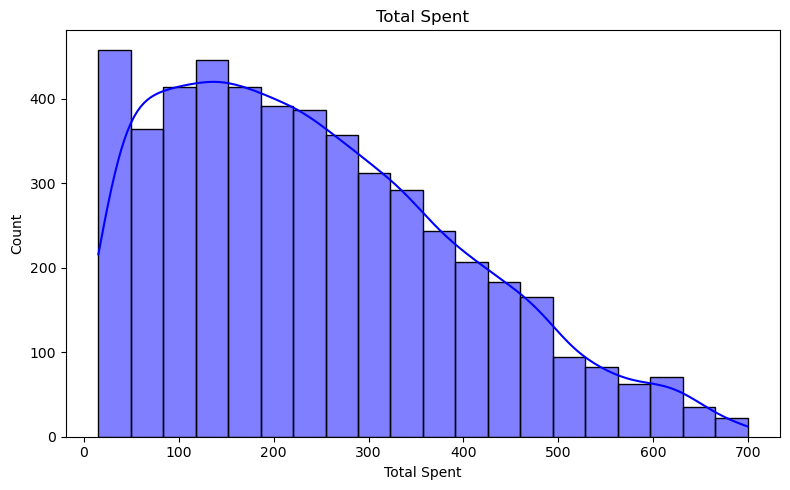

In [8]:
# Distribution of Price (or any numeric column you want to analyze)
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Spent'], kde=True, bins=20, color='blue')
plt.title('Total Spent')
plt.tight_layout()
plt.show()

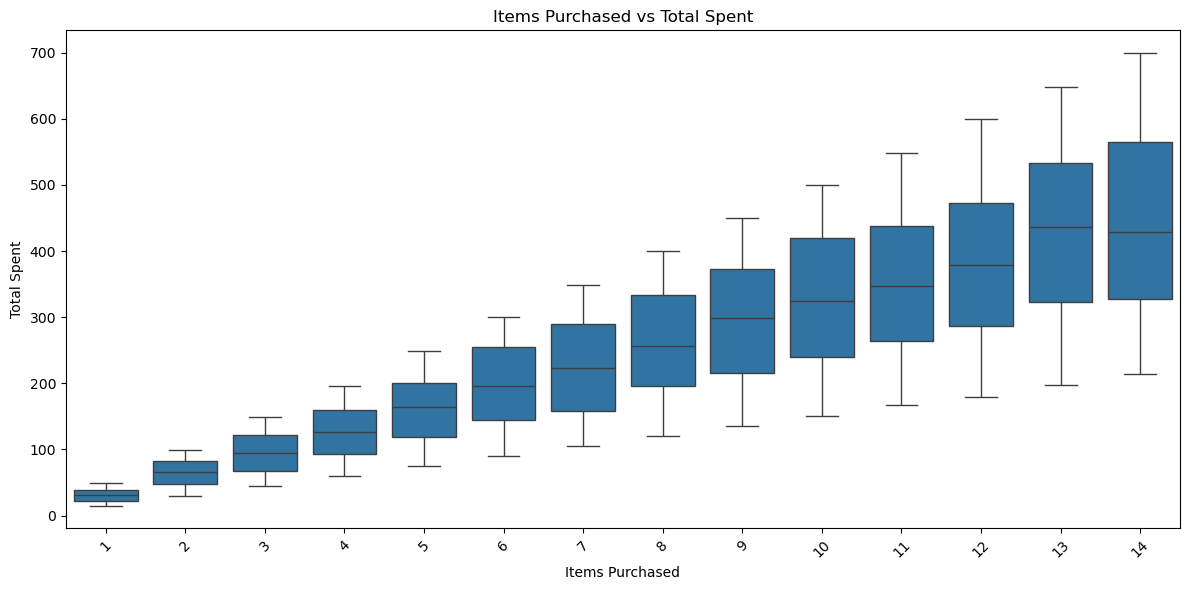

In [9]:
# Price Distribution by Category (Boxplot to detect outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Items Purchased', y='Total Spent')  # Replace 'Price' with any numeric column
plt.title('Items Purchased vs Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Original rows: 5000
After outlier removal: 3738


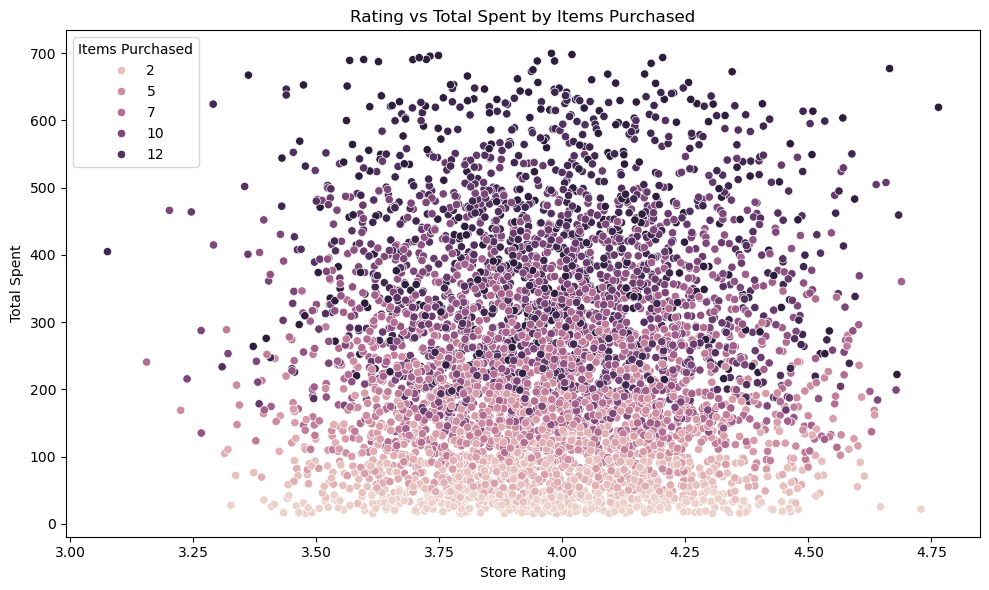

In [10]:
# Select only numeric columns for IQR outlier detection
numeric_df = df.select_dtypes(exclude="object")

# Compute Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((numeric_df < (Q1 - 1.5 * IQR)) | 
                      (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check how many rows were removed
print(f"Original rows: {df.shape[0]}")
print(f"After outlier removal: {df_no_outliers.shape[0]}")

# Scatter plot: Rating vs Price (replace with any relevant numeric fields)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Store Rating', y='Total Spent', hue='Items Purchased')
plt.title('Rating vs Total Spent by Items Purchased')
plt.xscale('linear')  # Or 'log' if needed
plt.tight_layout()
plt.show()

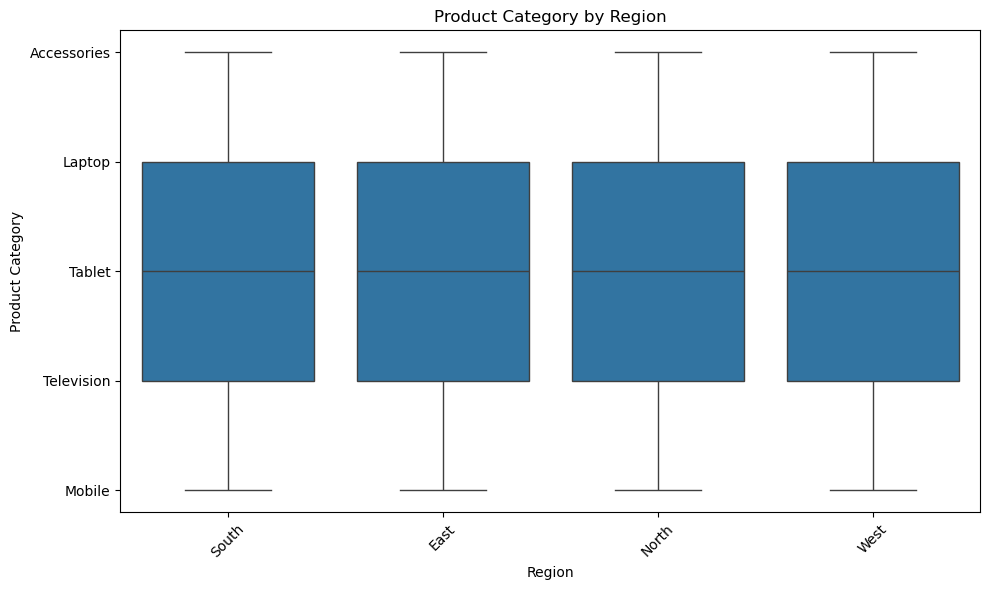

In [11]:
# Boxplot - To detect Outliers
# Energy Consumption by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Product Category')
plt.title('Product Category by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 


In [28]:
# --- Step 2: Encode categorical variables ---
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [30]:
# --- Step 3: Define features and target ---
target_column = 'Revenue'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [32]:
# --- Step 4: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# --- Step 5: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
# --- Step 6: Train a Regression Model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# --- Step 7: Make Predictions ---
y_pred = model.predict(X_test)

In [38]:
# --- Step 8: Evaluate the Model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
# --- Step 9: Feature Importance ---
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

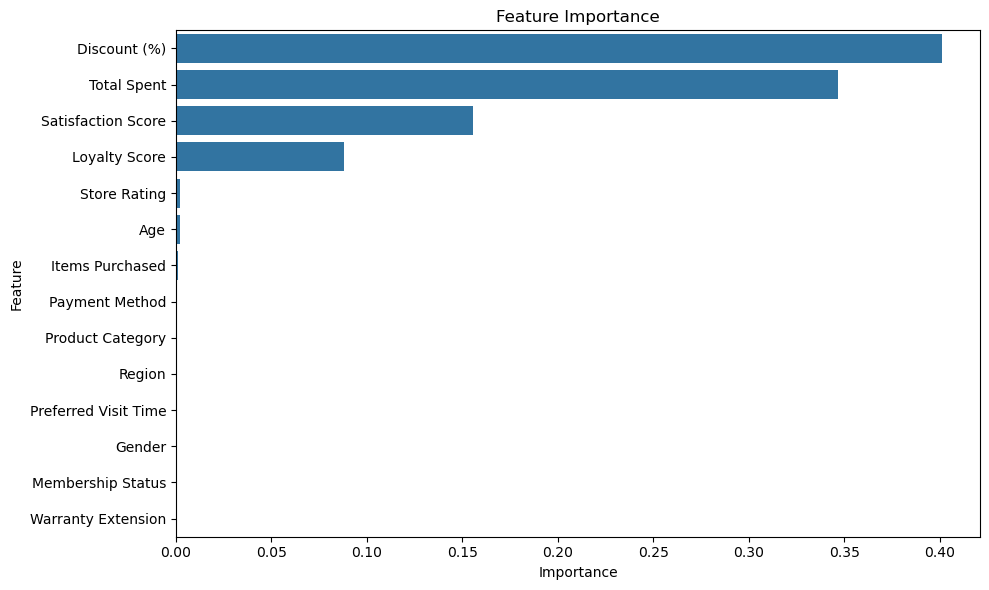

In [40]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [43]:
# Outlier Detection using IQR method
import pandas as pd

# Select only numeric columns for IQR outlier detection
numeric_df = df.select_dtypes(exclude="object")

# Compute Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((numeric_df < (Q1 - 1.5 * IQR)) | 
                              (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check how many rows were removed
print(f"Original rows: {df.shape[0]}")
print(f"After outlier removal: {df_no_outliers.shape[0]}")


Original rows: 5000
After outlier removal: 3738


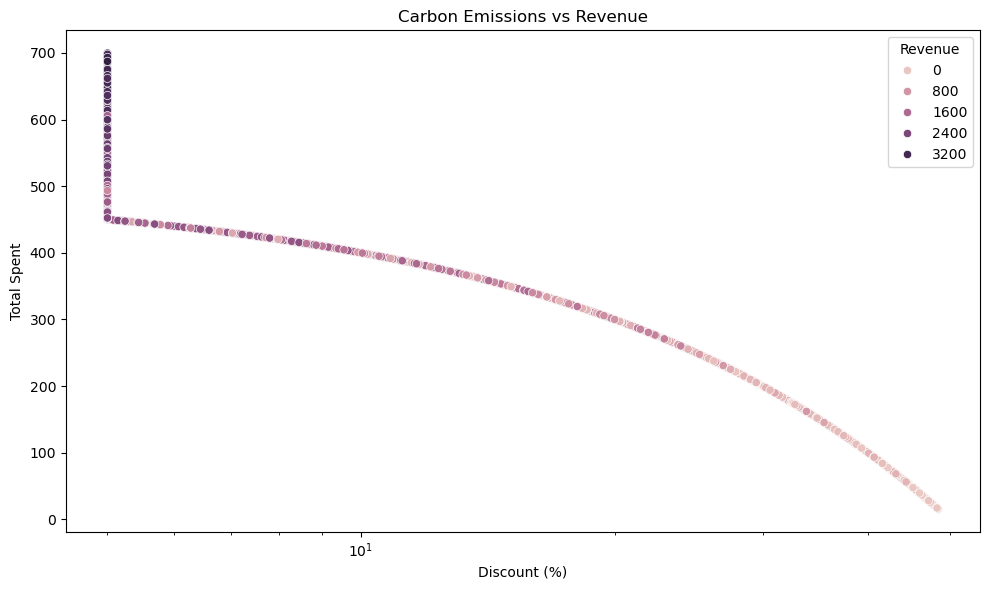

In [44]:
#
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount (%)', y='Total Spent', hue='Revenue')
plt.title('Carbon Emissions vs Revenue')
plt.xscale('log')  # If needed due to skew
plt.tight_layout()
plt.show()

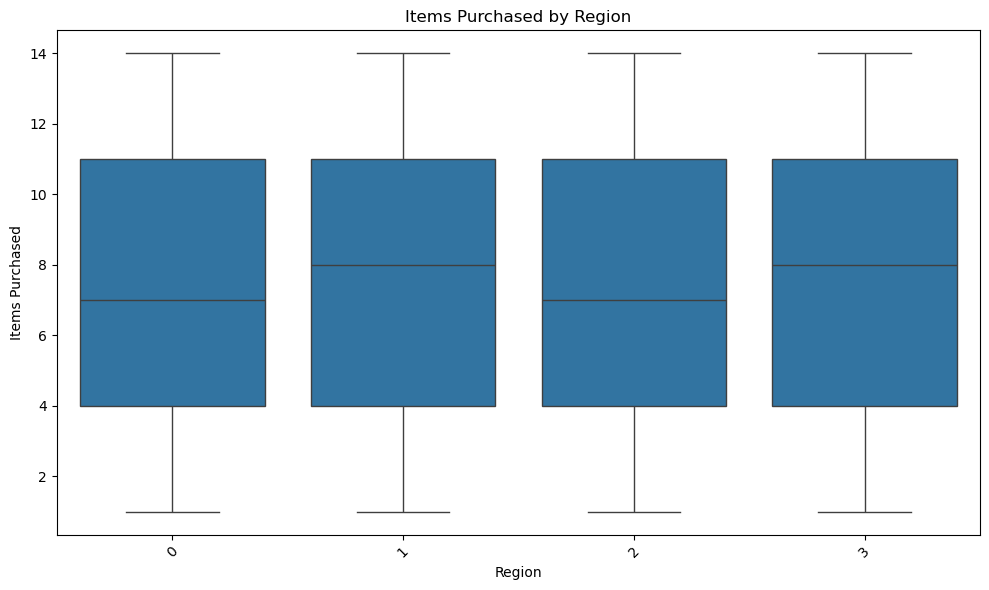

In [45]:
# Boxplot - To detect Outliers
# Energy Consumption by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Items Purchased')
plt.title('Items Purchased by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Drop missing values
df.dropna(inplace=True)

# Encode categorical columns
cat_cols = ['Gender', 'Age']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
target_col = 'Items Purchased'  # Replace with your actual target column name
X = df.drop(['Gender', 'Age', target_col], axis=1)  # Drop non-feature columns and target column
y = df[target_col]  # Assign the target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [57]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset

# Select features and target for logistic regression
features = [
    "Age", "Items Purchased", "Total Spent", "Discount (%)", 
    "Satisfaction Score", "Revenue", "Store Rating", "Loyalty Score"
]
target = "Membership Status"

# Define X and y
X = df[features]
y = df[target]

# Add a constant for the intercept
X = sm.add_constant(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_class)
mae = mean_absolute_error(y_test, y_pred_class)
r2 = r2_score(y_test, y_pred_class)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# Display full model summary (includes t-stats and p-values)
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.616667
         Iterations 5
Mean Squared Error (MSE): 0.31
Mean Absolute Error (MAE): 0.31
R-squared (R²): -0.449275362318841
                           Logit Regression Results                           
Dep. Variable:      Membership Status   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3991
Method:                           MLE   Df Model:                            8
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                0.001335
Time:                        21:54:26   Log-Likelihood:                -2466.7
converged:                       True   LL-Null:                       -2470.0
Covariance Type:            nonrobust   LLR p-value:                    0.5808
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

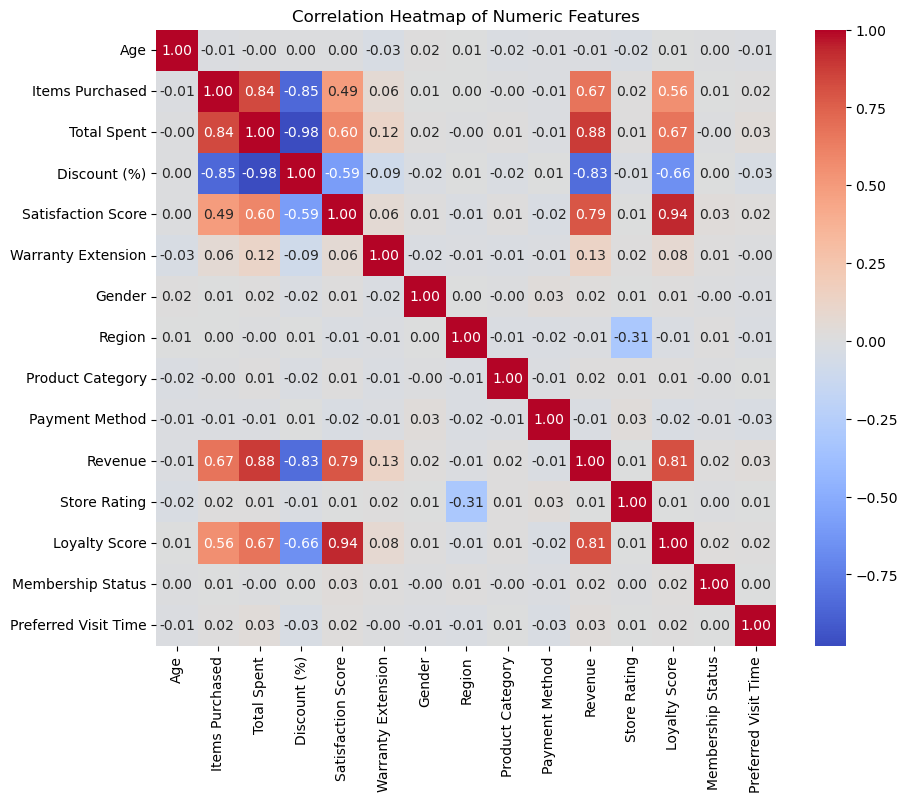

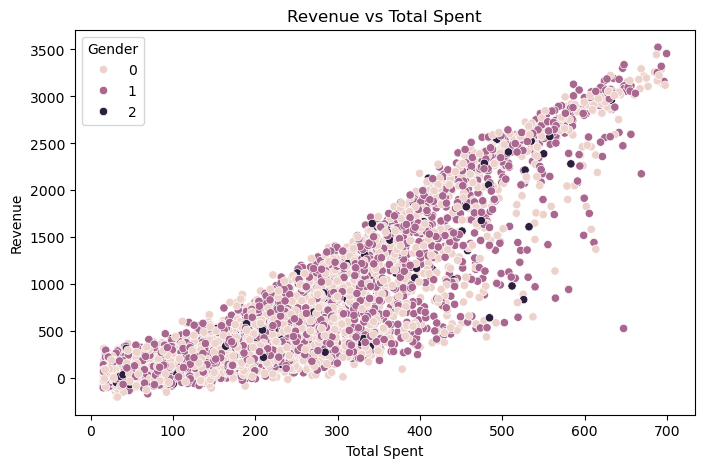

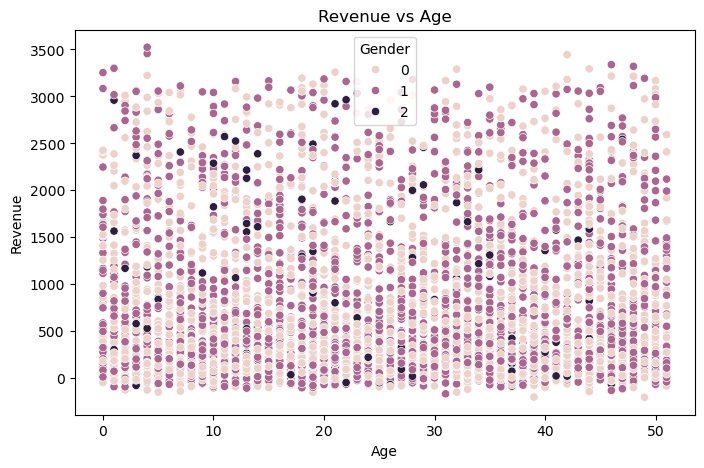

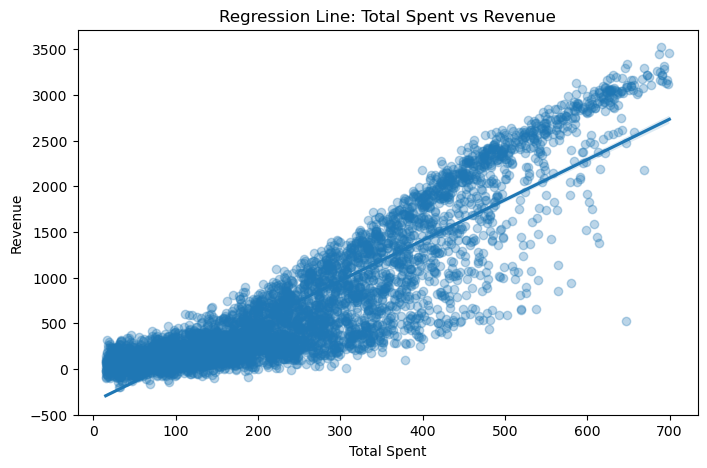

In [69]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Optional: Pairplot (can be heavy for large datasets)
# sns.pairplot(electronics[["Revenue", "Total Spent", "Age", "Satisfaction Score", "Loyalty Score"]])
# plt.show()

# Scatter Plot: Revenue vs Total Spent
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Total Spent", y="Revenue", hue="Gender")
plt.title("Revenue vs Total Spent")
plt.show()

# Scatter Plot: Revenue vs Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="Revenue", hue="Gender")
plt.title("Revenue vs Age")
plt.show()

# Regression Plot: Total Spent vs Revenue
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="Total Spent", y="Revenue", scatter_kws={"alpha":0.3})
plt.title("Regression Line: Total Spent vs Revenue")
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Encode categorical variables if needed
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Preferred Visit Time'] = le.fit_transform(df['Preferred Visit Time'])
df['Product Category'] = le.fit_transform(df['Product Category'])

# Define features and target
features = [
    "Age", "Gender", "Items Purchased", "Total Spent", "Discount (%)",
    "Satisfaction Score", "Revenue", "Store Rating", "Loyalty Score",
    "Preferred Visit Time", "Product Category"
]
target = "Membership Status"

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training with increased iterations and balanced classes
model = LogisticRegression(max_iter=5000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[331 359]
 [158 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.48      0.56       690
           1       0.30      0.49      0.37       310

    accuracy                           0.48      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.56      0.48      0.50      1000

Accuracy Score: 0.483


In [83]:
from scipy.stats import ttest_ind

# Choose two groups: Male vs Female Revenue
group_male = df[df['Gender'] == 'Male']['Revenue']
group_female = df[df['Gender'] == 'Female']['Revenue']

# Run Welch's independent t-test
t_stat, p_val = ttest_ind(group_male, group_female, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant difference in Revenue between Male and Female customers.")
else:
    print("No significant difference in Revenue between Male and Female customers.")

T-statistic: nan, P-value: nan
No significant difference in Revenue between Male and Female customers.
